# Train a Classification Network after C3D features

In [47]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_training(txt, max_epochs=100, max_loss=5):
    loss = re.findall('- loss: \d+\.\d+', txt)
    accuracy = re.findall('- acc: \d+\.\d+', txt)
    val_loss = re.findall('- val_loss: \d+\.\d+', txt)
    val_accuracy = re.findall('- val_acc: \d+\.\d+', txt)

    loss = np.array([float(x[8:]) for x in loss], dtype=np.float32)
    accuracy = np.array([float(x[7:]) for x in accuracy], dtype=np.float32)
    val_loss = np.array([float(x[12:]) for x in val_loss], dtype=np.float32)
    val_accuracy = np.array([float(x[11:]) for x in val_accuracy], dtype=np.float32)
    
    t = np.arange(1, len(val_loss)+1).astype(np.float32)
    fig, ax1 = plt.subplots(figsize=(18, 10), dpi=100)
    ax1.plot(t, loss[392::393], 'b-')
    ax1.plot(t, val_loss, 'b-.')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.set_xlim([0,max_epochs])
    ax1.set_ylim([0,max_loss])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(t, accuracy[392::393], 'r-')
    ax2.plot(t, val_accuracy, 'r-.')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.set_xlim([0,max_epochs])
    ax2.set_ylim([0, 1])
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

# Experiment 1

Initial Experiment

```
nb_experiment: 1
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.001
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
batchnormalization_1 (BatchNormaliz(256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     batchnormalization_1[0][0]       
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 512)      2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      lstm2[0][0]                      
====================================================================================================
Total params: 11649737
____________________________________________________________________________________________________
```

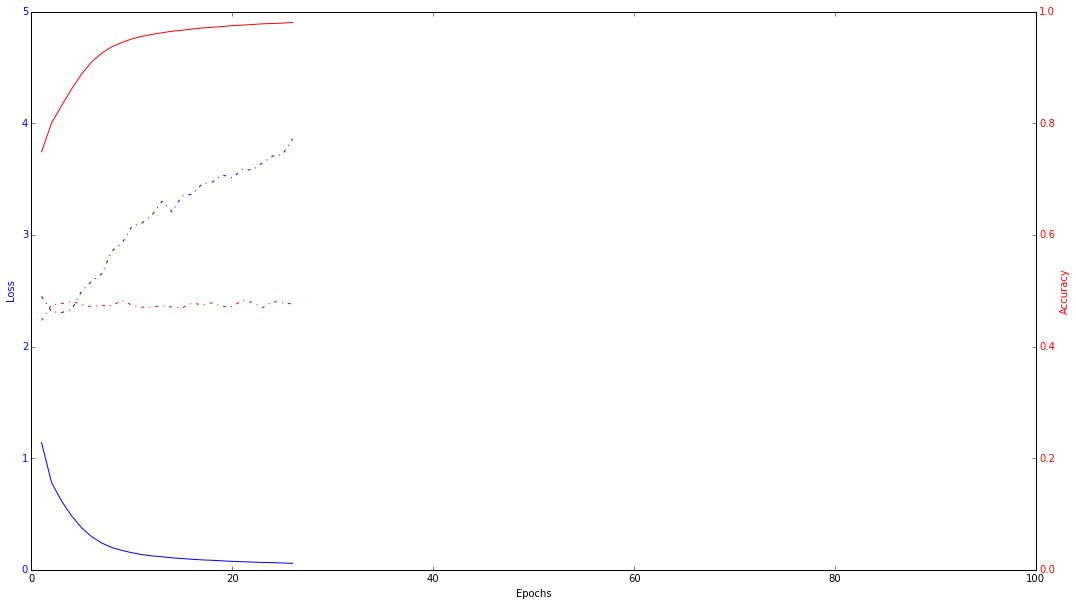

In [48]:
with open('../logs/training_e01.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 2

Decreasing learning rate to `lr=0.0001`

```
nb_experiment: 2
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
batchnormalization_1 (BatchNormaliz(256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     batchnormalization_1[0][0]       
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 512)      2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      lstm2[0][0]                      
====================================================================================================
Total params: 11649737
____________________________________________________________________________________________________
```

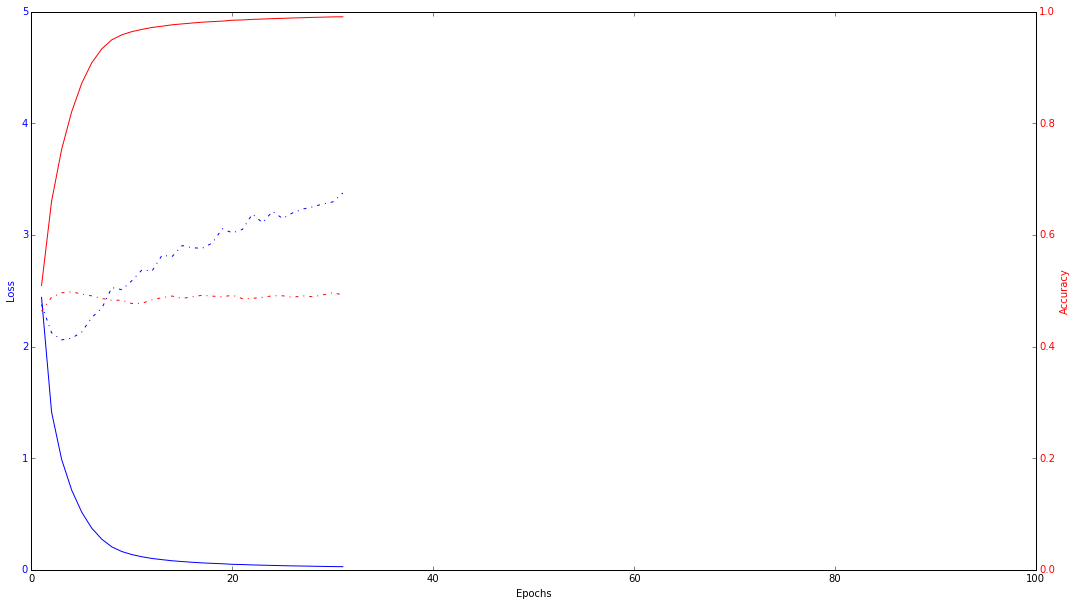

In [49]:
with open('../logs/training_e02.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 3

Now taking the `lr=0.0001` and adding two dropout layers, one previous to the first LSTM and the other after the last LSTM. The dropout probability for both is 0.5

````
nb_experiment: 3
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
batchnormalization_1 (BatchNormaliz(256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4096)     0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 512)      2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 11649737
____________________________________________________________________________________________________
```

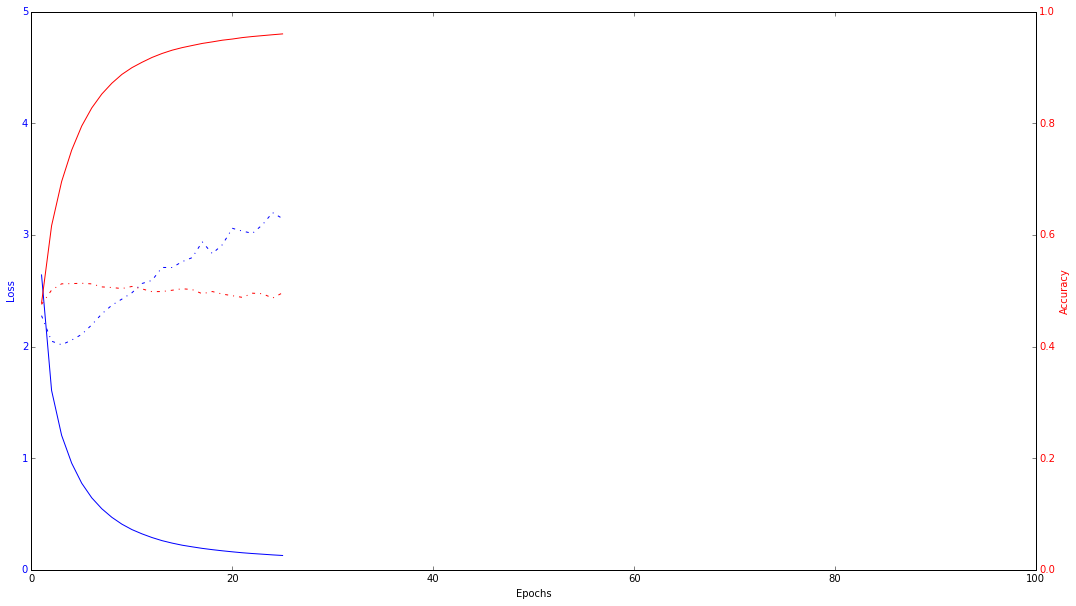

In [50]:
with open('../logs/training_e03.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 4

Now taking the `lr=0.00001` and adding two dropout layers, one previous to the first LSTM and the other after the last LSTM. The dropout probability for both is 0.5

```
nb_experiment: 4
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4096)     0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 512)      2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 11649737
____________________________________________________________________________________________________
```

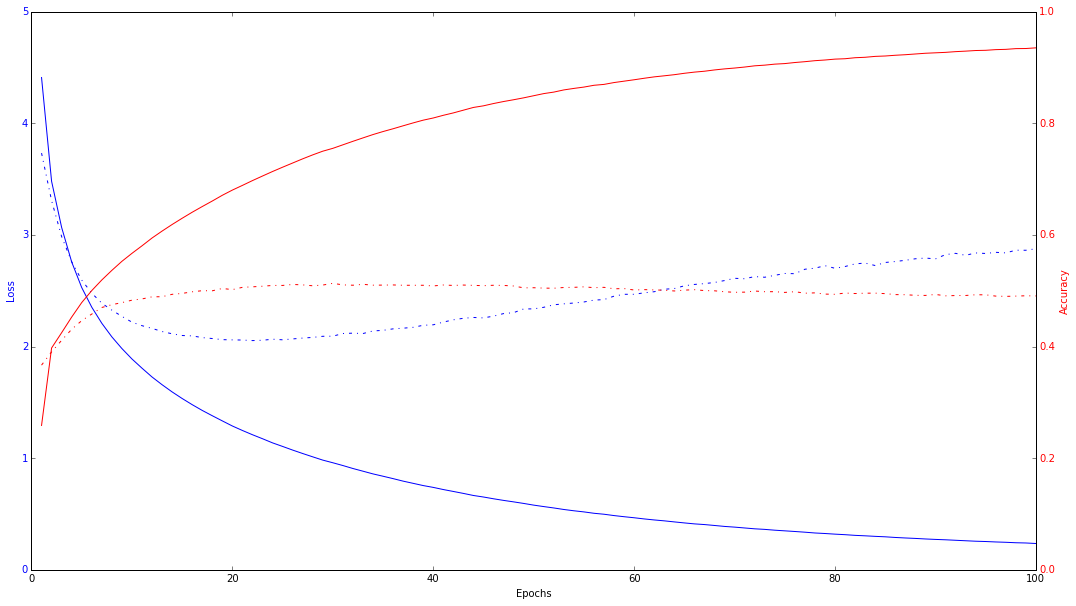

In [51]:
with open('../logs/training_e04.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

### Resultats

Epoch 35:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4857
	Number of predictions: 14484
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.549206775082
	Hit@3: 0.736494845361
	Avg Hit@3: 0.73618556701
```

Epoch 100:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4857
	Number of predictions: 14484
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.545181886381
	Hit@3: 0.724948453608
	Avg Hit@3: 0.724639175258
```

# Experiment 5

Only one 512-LSTM with dropout before and after. `lr=0.0001`

```
nb_experiment: 5
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4096)     0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 9550537
____________________________________________________________________________________________________
```

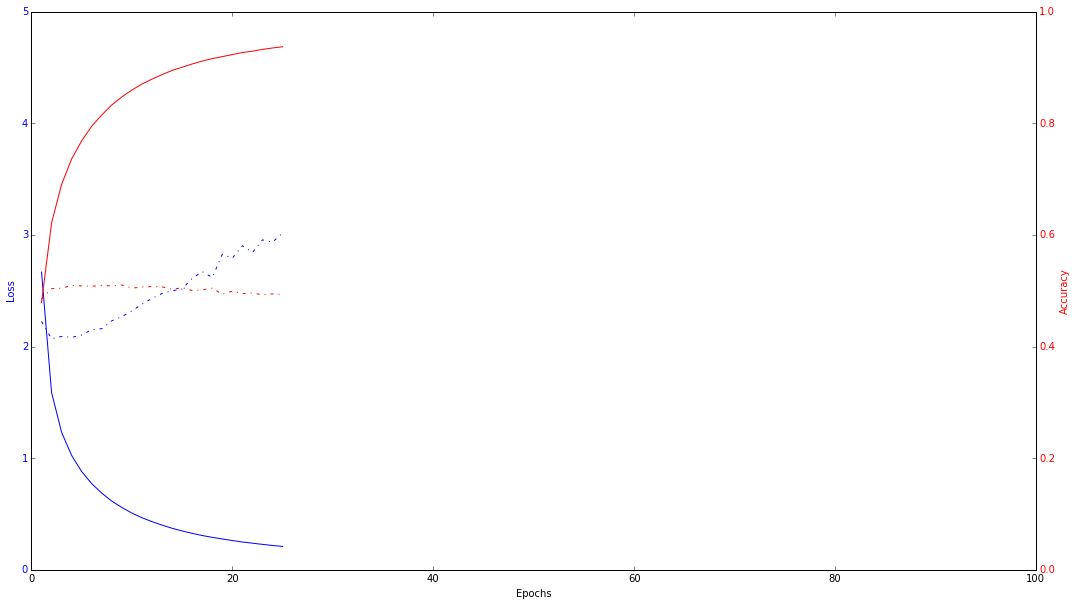

In [52]:
with open('../logs/training_e05.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 6

Only one 512-LSTM with dropout before and after. `lr=1e-5`

```
nb_experiment: 6
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4096)     0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 9550537
____________________________________________________________________________________________________
```

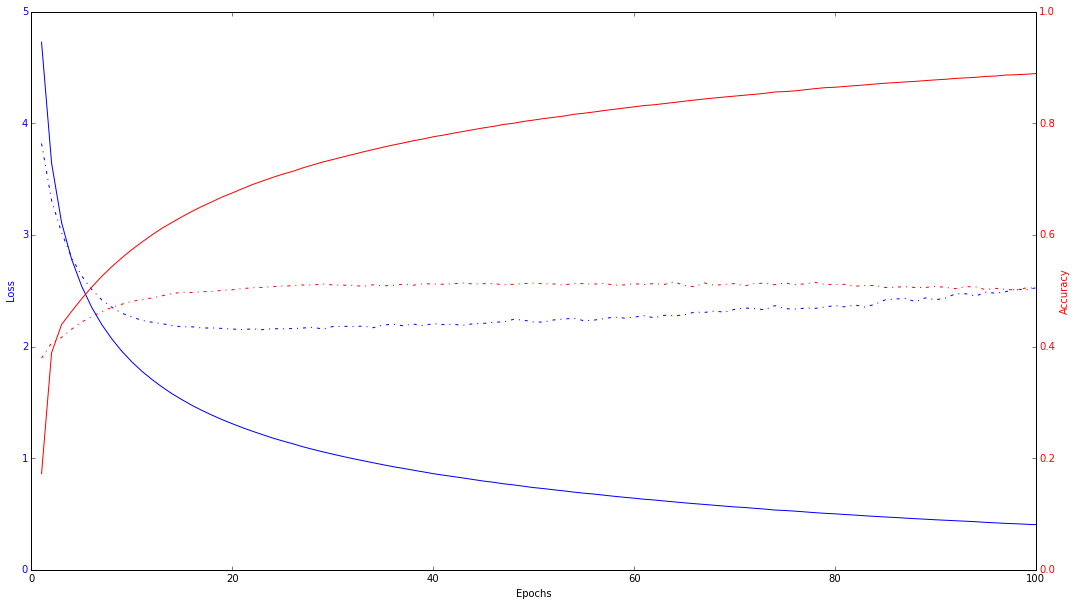

In [53]:
with open('../logs/training_e06.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

### Results

Epoch 100:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4857
	Number of predictions: 14484
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.576865934023
	Hit@3: 0.749690721649
	Avg Hit@3: 0.749484536082
```
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 7516
	Number of predictions: 4543
	Fixed threshold for tiou score: 0.5
[RESULTS] Performance on ActivityNet detection task.
	Mean Average Precision: 0.150753956944
```

# Experiment 7

Exactly the same as experiment 4 but adding the sample weights parameter

```
nb_experiment: 7
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4096)     0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 512)      2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 11649737
____________________________________________________________________________________________________
```

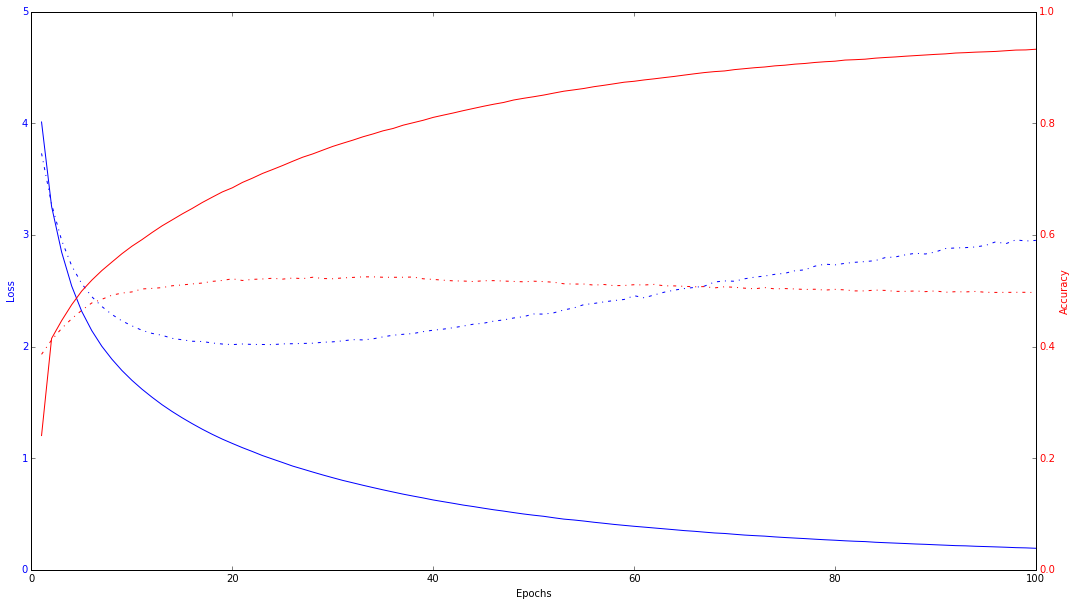

In [54]:
with open('../logs/training_e07.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 8

The same as experiment 6 but with a `lr=1e-6`

```
nb_experiment: 8
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-06
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)                (256, 20, 4096)     0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 512)      9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)                (256, 20, 512)      0           lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      103113      dropout_2[0][0]                  
====================================================================================================
Total params: 9550537
____________________________________________________________________________________________________
```

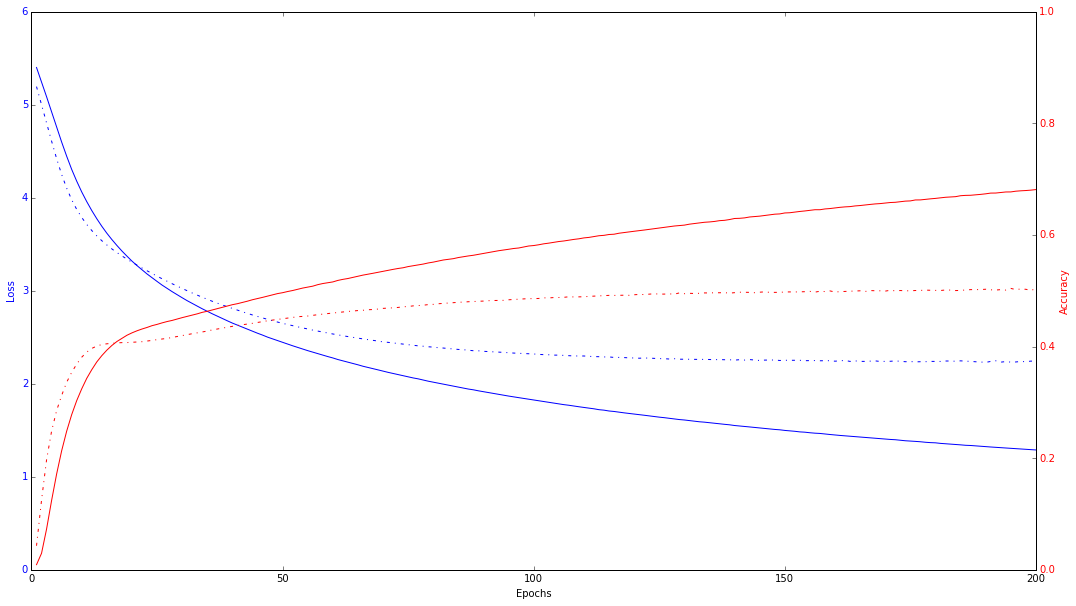

In [55]:
with open('../logs/training_e08.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=200, max_loss=6)

Epoch 200:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4855
	Number of predictions: 14478
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.525251330215
	Hit@3: 0.712665016502
	Avg Hit@3: 0.712458745875
```

# Experiment 9

The same as experiment 7 but decreassing the weight given to the background class from `.6` to `.3`

```
nb_experiment: 9
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 512)        0           lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        103113      dropout_2[0][0]                  
====================================================================================================
Total params: 9550537
____________________________________________________________________________________________________
```

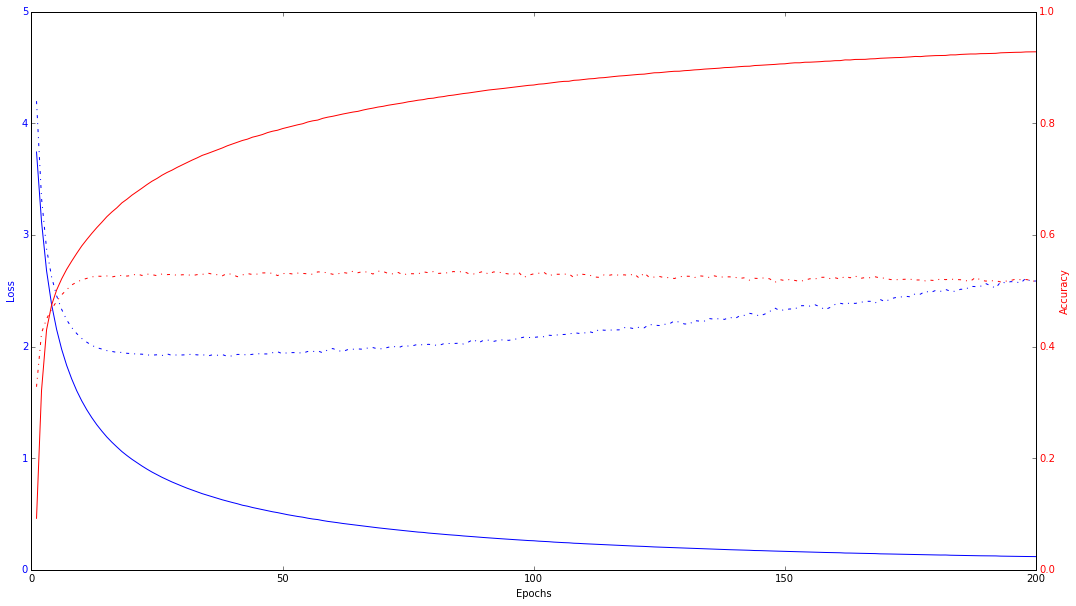

In [56]:
with open('../logs/training_e09.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=200, max_loss=5)

Epoch 100:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4852
	Number of predictions: 14469
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.593816599081
	Hit@3: 0.757688338493
	Avg Hit@3: 0.75737874097
```
Epoch 150:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4852
	Number of predictions: 14469
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.583639241502
	Hit@3: 0.744478844169
	Avg Hit@3: 0.744066047472
```
Epoch 200:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4852
	Number of predictions: 14469
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.576444150465
	Hit@3: 0.738286893705
	Avg Hit@3: 0.737874097007
```

# Experiment 10

2-LSTM, sample weight to 0.3, lr=1e-6, with two dropout

```
nb_experiment: 10
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-06
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                     (256, 20, 512)        2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 512)        0           lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        103113      dropout_2[0][0]                  
====================================================================================================
Total params: 11649737
____________________________________________________________________________________________________
```

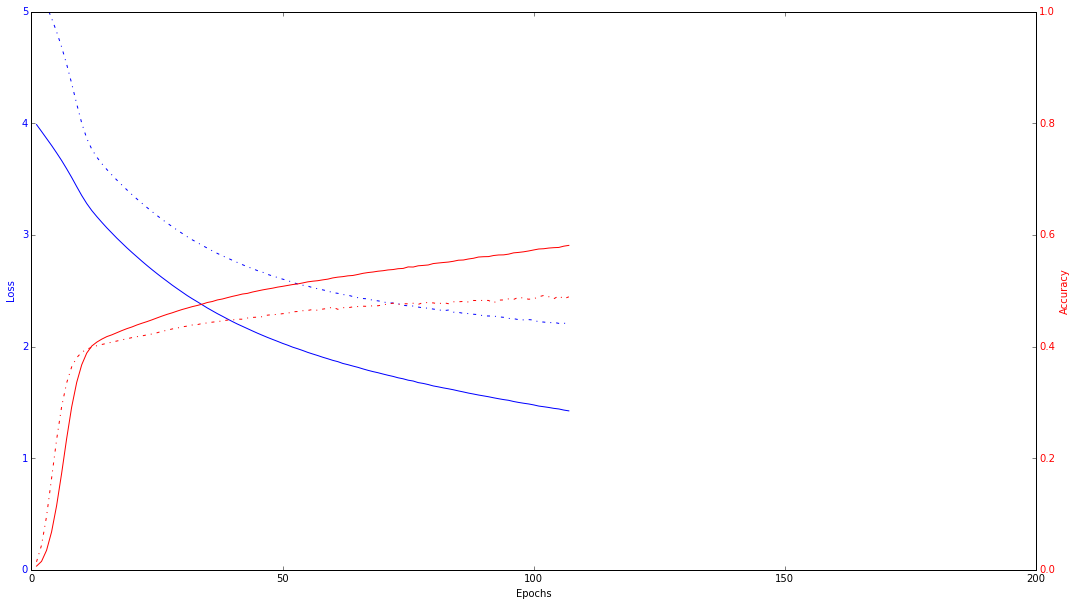

In [57]:
with open('../logs/training_e10.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=200, max_loss=5)

# Experiment 11

The same as experiment 9 but with a learning rate scheduler which at the begining there is `lr=1e-5` and at the 40th epoch it decreases to `lr=1e-6`.

```
nb_experiment: 11
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 512)        0           lstm1[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        103113      dropout_2[0][0]                  
====================================================================================================
Total params: 9550537
____________________________________________________________________________________________________
```

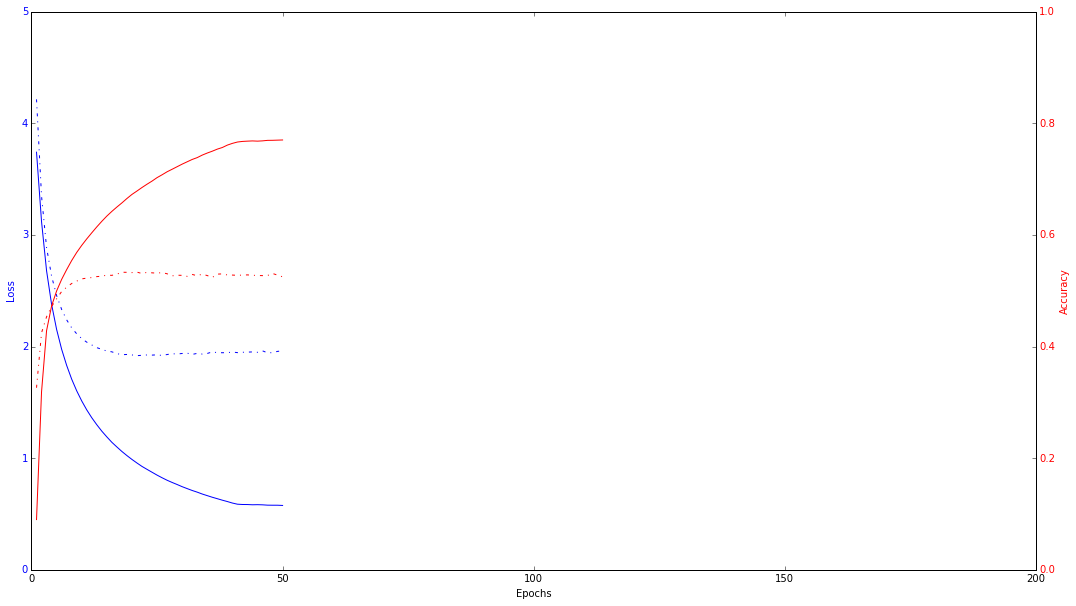

In [58]:
with open('../logs/training_e11.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=200, max_loss=5)

# Experiment 12

Train with a deeper network to have more learning habilities. Set the sample weight for loss computation. 3 1024-LSTM and dropout at beggining and ending of recurrent layers. `lr=1e-5`

```
nb_experiment: 12
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-05

Compiling model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 1024)       20975616    dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                     (256, 20, 1024)       8392704     lstm1[0][0]                      
____________________________________________________________________________________________________
lstm3 (LSTM)                     (256, 20, 1024)       8392704     lstm2[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 1024)       0           lstm3[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        206025      dropout_2[0][0]                  
====================================================================================================
Total params: 37975241
____________________________________________________________________________________________________
```

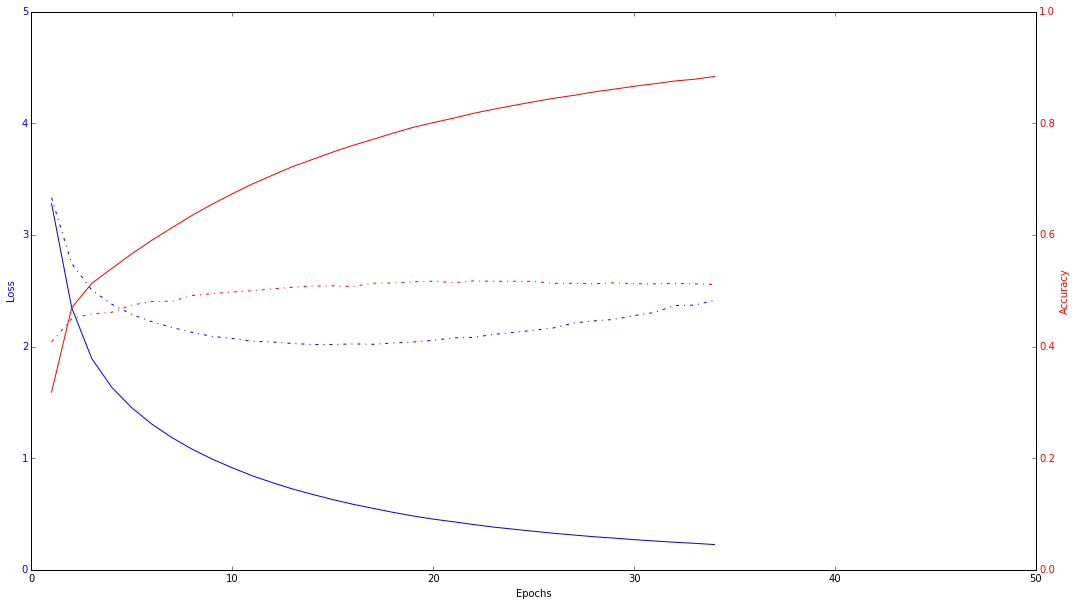

In [67]:
with open('../logs/training_e12.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=50, max_loss=5)

Epoch 30:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4850
	Number of predictions: 14463
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.563566695554
	Hit@3: 0.743753871567
	Avg Hit@3: 0.743650629775
```

# Experiment 13

Train with a deeper network to have more learning habilities. Set the sample weight for loss computation. 3 512-LSTM and dropout at beggining and ending of recurrent layers. `lr=1e-6`

```
nb_experiment: 13
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-06

Compiling model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 1024)       20975616    dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm2 (LSTM)                     (256, 20, 1024)       8392704     lstm1[0][0]                      
____________________________________________________________________________________________________
lstm3 (LSTM)                     (256, 20, 1024)       8392704     lstm2[0][0]                      
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 1024)       0           lstm3[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        206025      dropout_2[0][0]                  
====================================================================================================
Total params: 37975241
____________________________________________________________________________________________________
```

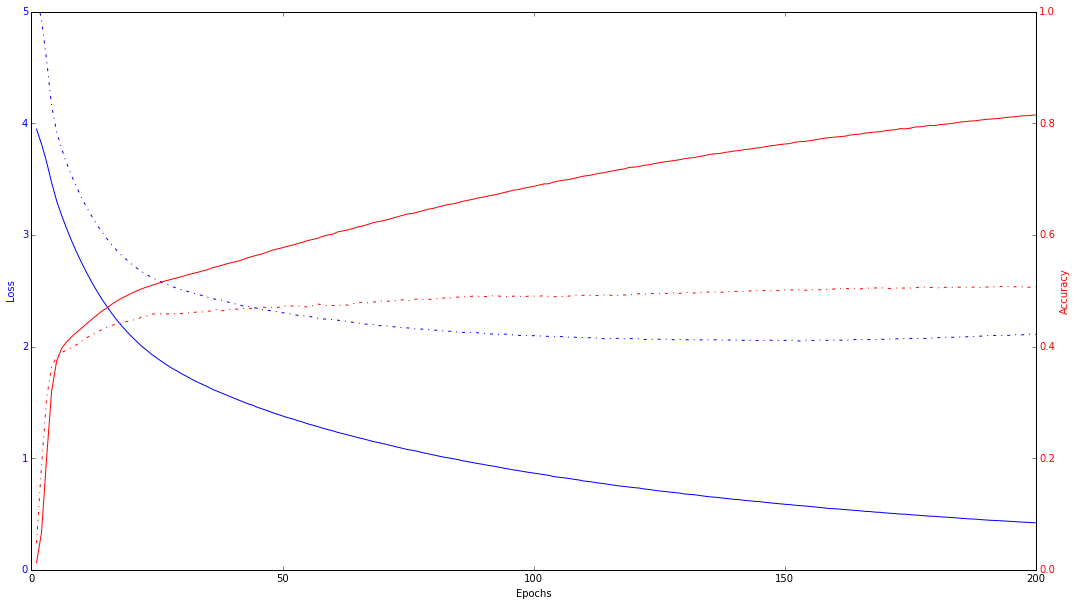

In [92]:
with open('../logs/training_e13.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=200, max_loss=5)

Epoch 200:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4849
	Number of predictions: 14460
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.560944411553
	Hit@3: 0.736266005783
	Avg Hit@3: 0.736059479554
```

# Experiment 3bis

Check how the training was with a deeply configuration. (3xLSTM(1024)). Default lr=0.001

```
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
batchnormalization_1 (BatchNormaliz(256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 1024)     20975616    batchnormalization_1[0][0]       
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 1024)     8392704     lstm1[0][0]                      
____________________________________________________________________________________________________
lstm3 (LSTM)                       (256, 20, 1024)     8392704     lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      206025      lstm3[0][0]                      
====================================================================================================
Total params: 37975241
____________________________________________________________________________________________________
```

Parsing the log file to get the loss, accuracy for training and validation

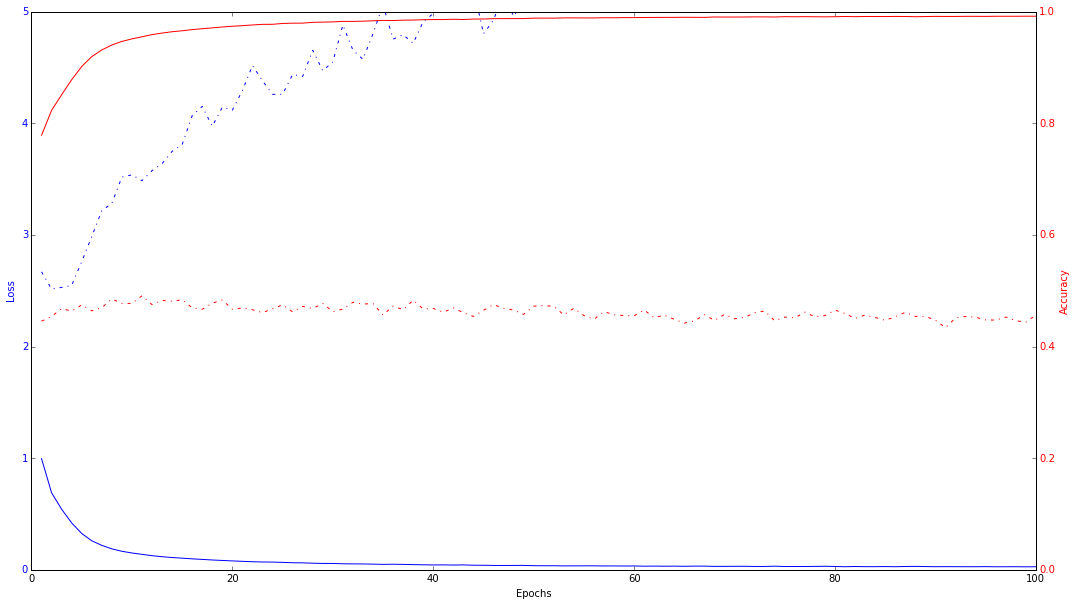

In [18]:
with open('../logs/training_deeper_e3.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 4bis

Decresed the `lr` to 0.0001 and added a dropout layer between normalization and the first LSTM layer with `p=0.5`

```
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
====================================================================================================
features (InputLayer)              (256, 20, 4096)     0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization) (256, 20, 4096)     8192        features[0][0]                   
____________________________________________________________________________________________________
dropout (Dropout)                  (256, 20, 4096)     0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                       (256, 20, 1024)     20975616    dropout[0][0]                    
____________________________________________________________________________________________________
lstm2 (LSTM)                       (256, 20, 1024)     8392704     lstm1[0][0]                      
____________________________________________________________________________________________________
lstm3 (LSTM)                       (256, 20, 1024)     8392704     lstm2[0][0]                      
____________________________________________________________________________________________________
fc (TimeDistributed)               (256, 20, 201)      206025      lstm3[0][0]                      
====================================================================================================
Total params: 37975241
____________________________________________________________________________________________________
```

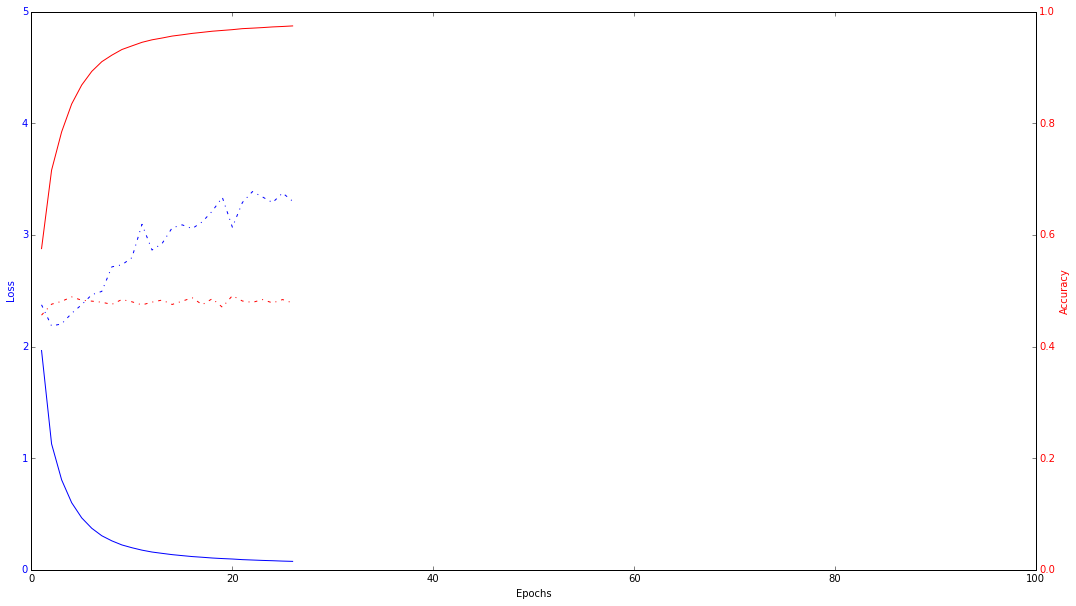

In [75]:
with open('../logs/training_deeper_e4.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)